In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

#data scrapping from yahoo finance
df = yf.download('AAPL', start=start, end=end)

df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454504,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.909012,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974495,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342979,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316277,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733612,144114400


In [ ]:
#removing date as index
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454504,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


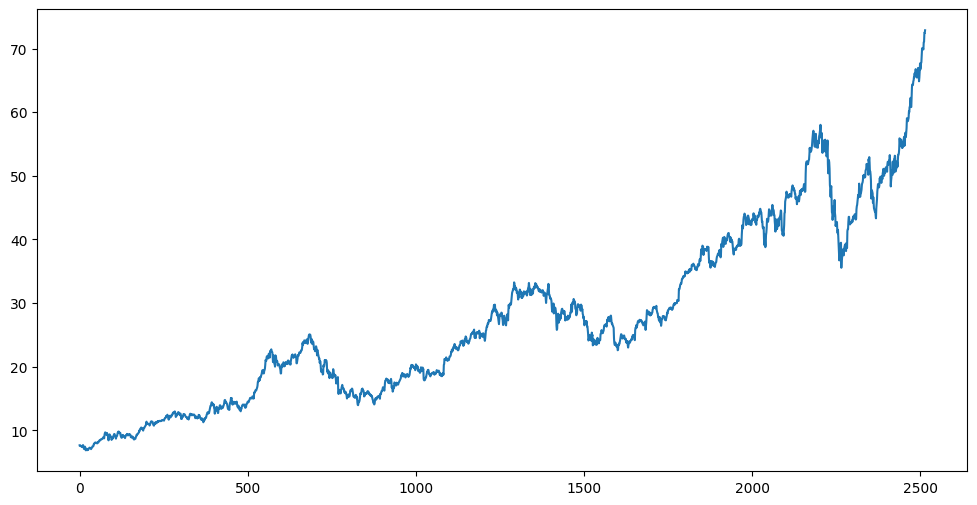

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')

In [ ]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [ ]:
#moving average for 100 days' closing price
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,59.201075
2511,59.401700
2512,59.643125
2513,59.875125


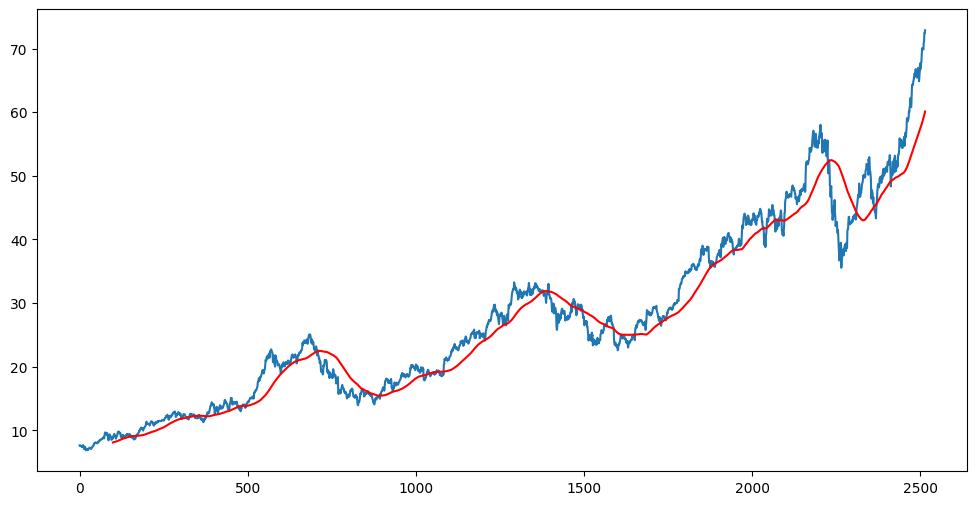

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,54.132313
2511,54.261513
2512,54.396763
2513,54.529350


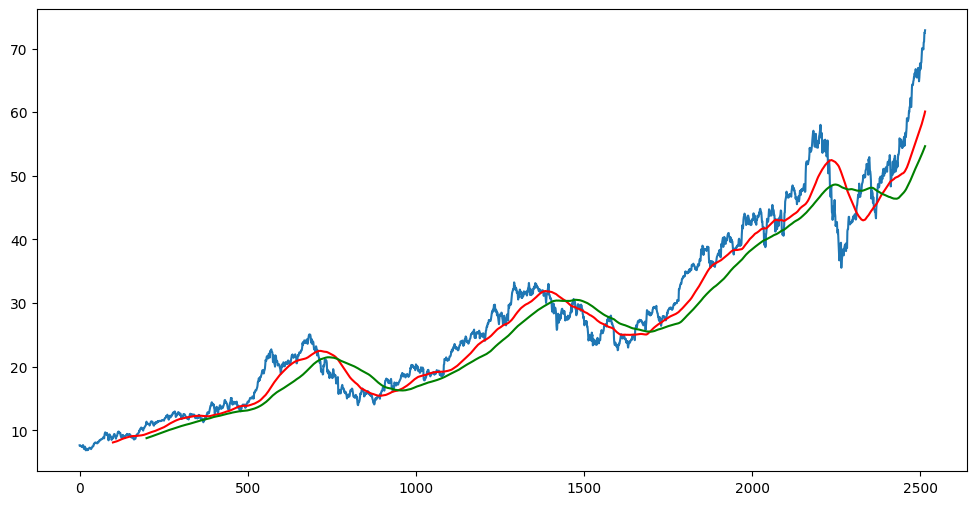

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(2515, 5)

In [77]:
# Splitting data into training and testing sets
dtraining = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
dtesting = pd.DataFrame(df['Close'][int(len(df) * 0.70):])

In [ ]:
dtraining.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
dtesting.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [78]:
#scaling down data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dtraining_array = scaler.fit_transform(dtraining)

In [79]:
dtraining_array = scaler.fit_transform(dtraining)
dtesting_array = scaler.transform(dtesting)

In [80]:
# Prepare training data
x_train = []
y_train = []
for i in range(100, len(dtraining_array)):
    x_train.append(dtraining_array[i-100:i])
    y_train.append(dtraining_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#lstm model

In [ ]:
import keras.layers

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [81]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 299ms/step - loss: 0.1528
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - loss: 0.0143
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 303ms/step - loss: 0.0109
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 300ms/step - loss: 0.0098
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 296ms/step - loss: 0.0091
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - loss: 0.0091
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - loss: 0.0081
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 320ms/step - loss: 0.0085
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - loss: 0.0074
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - loss: 0.0067
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 315ms/step - loss: 0.0068
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - loss: 0.0067
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 339ms/step - loss: 0.0077
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 296ms/step - loss: 0.0061
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [84]:
model.save('keras_model.h5')

In [85]:
past_100_days = dtraining.tail(100)
final_df = pd.concat([past_100_days, dtesting], ignore_index=True)
input_data = scaler.transform(final_df)

In [86]:
x_test = []
y_test = []
for i in range(100, len(input_data)):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)


In [87]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


In [88]:
y_predicted_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((y_predicted.shape[0], df.shape[1] - 1)), y_predicted], axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], df.shape[1] - 1)), y_test.reshape(-1, 1)], axis=1))[:, -1]


In [89]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

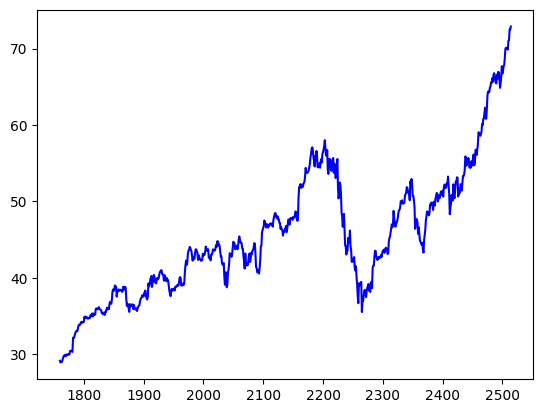

In [90]:
plt.plot(df.index[int(len(df) * 0.70):], df['Close'].values[int(len(df) * 0.70):], 'b', label='Original Price')
